<a id='top'></a>

# About

The idea behind analysing the Goodreads dataset is to study the various factors that might affect the sales of a book. With the rise in electronic media, one would think books have become a lost part of life. Yet through this dataset we'll see what convinces people into picking one up. Starting from age old classics, we'll talk about every book- their ratings and popularity, and about the most celebrated authors of all time and analyse their careers. 

# Table of Contents

1. [Loading libraries](#lib)
2. [Understanding our data](#und)
3. [Data cleaning](#clean)
4. [Exploratory Data Analysis](#eda)

    - [Top authors on Goodreads based on the number of books published](#num_books)
    - [Top 20 most occuring books](#most_occur)
    - [Top 10 highest rated books](#high_rate)
    - [Top 10 most popular books of all time](#pop)
    - [Distribution of average ratings and number of ratings in the list](#avg_rate_vs_count)
    - [Pie plot depicting rating distribution](#pie)
    - [Career of top authors (year vs avg rating)](#career)
    - [3D plot of Pages vs avg rating vs rating count](#3d)
    - [Distribution of language](#lang_dist)
    - [Top 10 books with highest review count](#high_rev)
    - [Pages Vs Rating count](#page_vs_count)
    - [Rating count vs reviews count](#rate_vs_rev)
    - [Top 10 publishers](#pub)
    - [Year vs page no.](#year_vs_page)

<a id='lib'></a>
# Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

<a id='und'></a>

# Understanding our data

In [2]:
df = pd.read_csv('books1.csv')

In [3]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [4]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


<a id='clean'></a>
# Data Cleaning

In [5]:
df_copy = df_copy.replace(['11/31/2000','6/31/1982'],['10/31/2000','6/30/1982'])

In [6]:
df_copy.iloc[[8180,11098]]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,553575104,9780553575101,eng,718,10608,295,10/31/2000,Bantam Books
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,6/30/1982,Folio histoire


In [7]:
df_copy['publication_date'] = pd.to_datetime(df_copy['publication_date'], errors='raise')
df_copy['month'] = df_copy['publication_date'].dt.month
df_copy['day'] = df_copy['publication_date'].dt.day
df_copy['year'] = df_copy['publication_date'].dt.year


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11127 non-null  int64         
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11127 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  int64         
 6   language_code       11127 non-null  object        
 7   num_pages           11127 non-null  int64         
 8   ratings_count       11127 non-null  int64         
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11127 non-null  datetime64[ns]
 11  publisher           11127 non-null  object        
 12  month               11127 non-null  int64         
 13  day                 11127 non-null  int64     

The publication date has been changed to DateTime type, and all columns are filled.

In [9]:
df_copy['real_author'] = df_copy['authors'].apply(lambda x: x.split('/')[0])

In [10]:
df_copy.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,month,day,year,real_author
6845,25789,The Book of Five Rings,Miyamoto Musashi/Thomas Cleary,4.07,1590302486,9781590302484,eng,166,926,74,2005-01-11,Shambhala,1,11,2005,Miyamoto Musashi
3094,11380,Die Geisha,Arthur Golden,4.11,3442726328,9783442726325,ger,573,314,14,2000-02-01,Wilhelm Goldmann Verlag GmbH,2,1,2000,Arthur Golden
8400,32317,Who's To Blame (Sweet Valley High #66),Francine Pascal/Kate William,3.36,553285556,9780553285550,eng,152,406,5,1990-06-01,Bantam,6,1,1990,Francine Pascal
4456,16047,A Thread of Grace,Mary Doria Russell,4.02,449004139,9780449004135,eng,442,11782,1332,2005-12-06,Ballantine Books,12,6,2005,Mary Doria Russell
4724,16989,Spider-Man: Saga of the Sandman,Stan Lee/Roy Thomas/Tom DeFalco/Kurt Busiek/St...,3.43,785124977,9780785124979,eng,176,46,5,2007-03-21,Marvel,3,21,2007,Stan Lee
8603,33029,Star Wars: Underworld - The Yavin Vassilika,Mike Kennedy/Carlos Meglia,3.35,1569716188,9781569716182,eng,120,83,6,2001-10-16,Dark Horse Books,10,16,2001,Mike Kennedy
8539,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,753453215,9780753453216,eng,95,8,3,2000-09-15,Kingfisher,9,15,2000,Homer
2674,9828,Rat Bastards: The Life and Times of South Bost...,"John ""Red"" Shea/Mark Wahlberg",3.51,60837160,9780060837167,eng,304,34,3,2006-03-14,William Morrow,3,14,2006,"John ""Red"" Shea"
1779,6259,Birdsong,Sebastian Faulks,4.09,679776818,9780679776819,eng,483,57513,2306,1997-06-02,Vintage International,6,2,1997,Sebastian Faulks
3926,13991,This Rough Magic (Heirs of Alexandria #2),Mercedes Lackey/Eric Flint/Dave Freer,3.86,743499093,9780743499095,eng,893,1189,23,2005-06-01,Baen,6,1,2005,Mercedes Lackey


#### We have added a new column named 'real_author'

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11127 non-null  int64         
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11127 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  int64         
 6   language_code       11127 non-null  object        
 7   num_pages           11127 non-null  int64         
 8   ratings_count       11127 non-null  int64         
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11127 non-null  datetime64[ns]
 11  publisher           11127 non-null  object        
 12  month               11127 non-null  int64         
 13  day                 11127 non-null  int64     

## Correlation of parameters with every other parameter 

In [12]:
df_copy.corr(numeric_only=True)

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,month,day,year
bookID,1.000000,-0.036949,-0.002185,-0.026223,-0.076815,-0.081284,0.000842,-0.013574,0.027164
average_rating,-0.036949,1.000000,-0.002013,0.150809,0.038205,0.033734,0.023273,-0.000677,-0.028799
isbn13,-0.002185,-0.002013,1.000000,-0.009822,0.005491,0.008148,-0.010099,0.005288,-0.000354
num_pages,-0.026223,0.150809,-0.009822,1.000000,0.034353,0.036998,0.025599,0.022412,-0.019200
ratings_count,-0.076815,0.038205,0.005491,0.034353,1.000000,0.865979,-0.015697,-0.001711,0.044576
text_reviews_count,-0.081284,0.033734,0.008148,0.036998,0.865979,1.000000,-0.024913,0.010876,0.066923
month,0.000842,0.023273,-0.010099,0.025599,-0.015697,-0.024913,1.000000,0.040913,0.022770
day,-0.013574,-0.000677,0.005288,0.022412,-0.001711,0.010876,0.040913,1.000000,0.056310
year,0.027164,-0.028799,-0.000354,-0.019200,0.044576,0.066923,0.022770,0.056310,1.000000


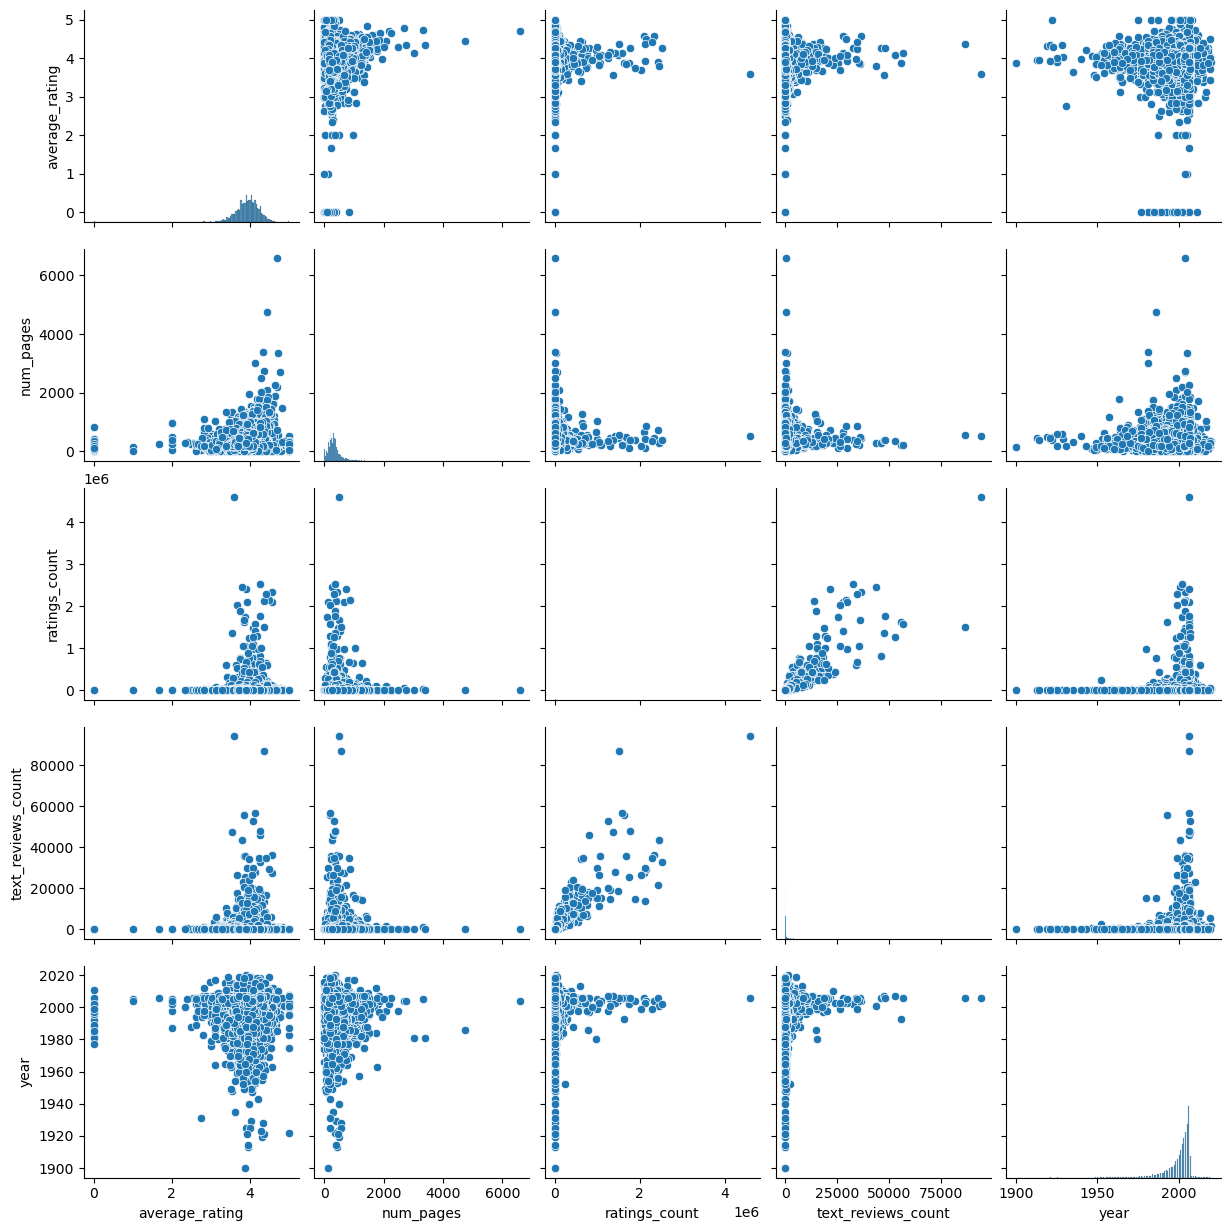

In [13]:
sns.pairplot(df_copy[['average_rating','num_pages','ratings_count','text_reviews_count','year']])

C:\Users\baiba\AppData\Local\Temp\ipykernel_22276\86335559.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),cmap='viridis')


(9.0, 0.0)

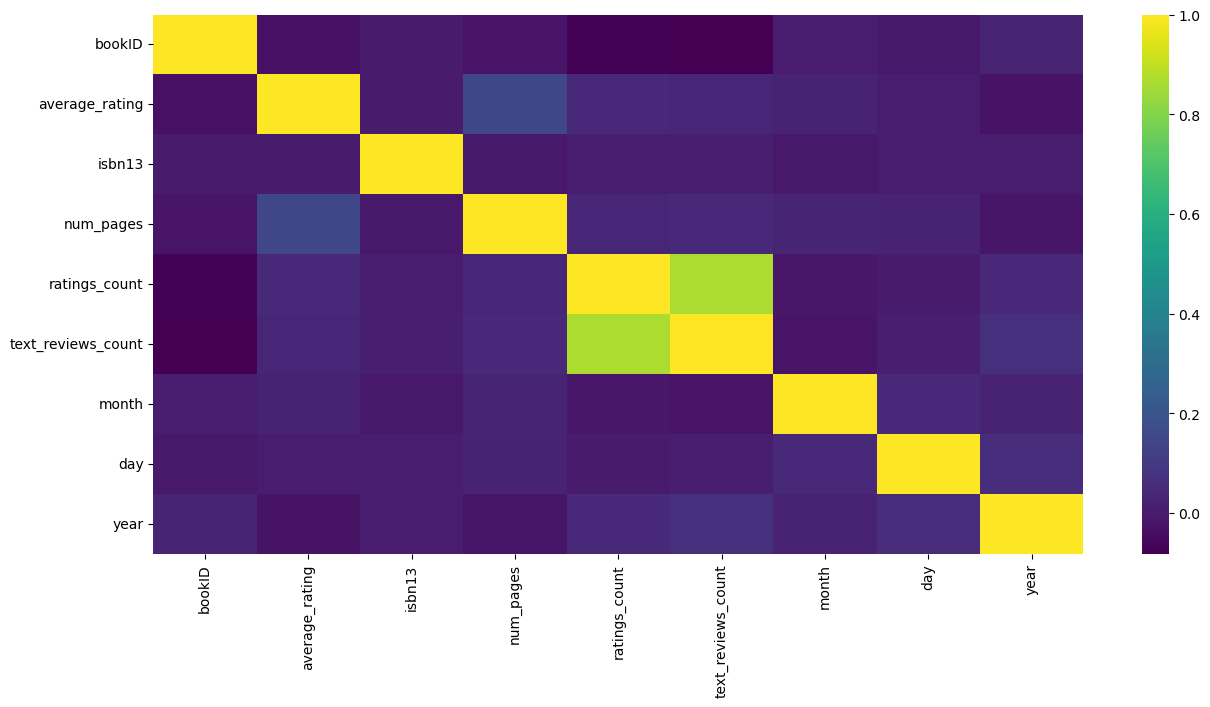

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df_copy.corr(),cmap='viridis')
plt.ylim(9, 0)

<a id='eda'></a>
# Exploratory Data Analysis

<a id='num_books'></a>

### Top authors on Goodreads based on the number of books published

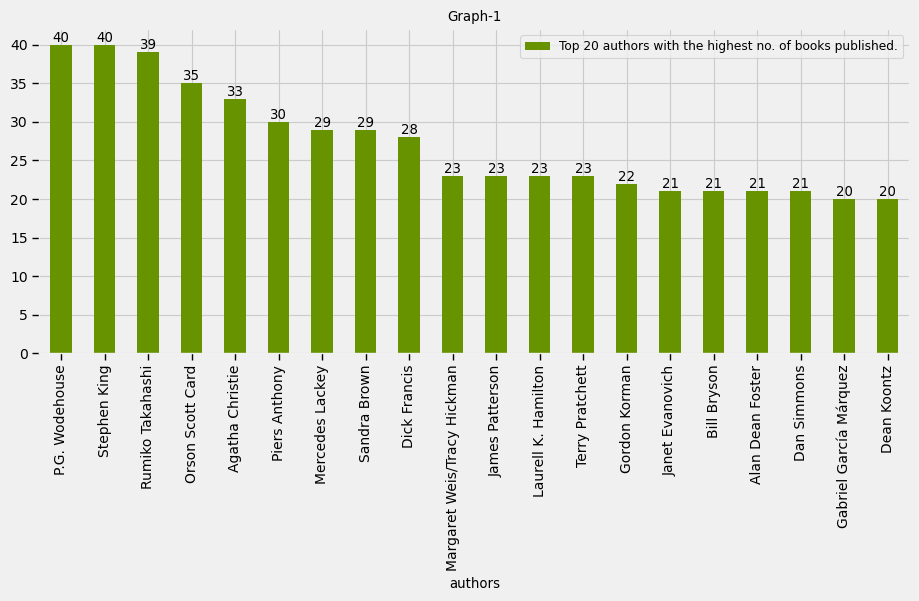

In [15]:
plt.style.use('fivethirtyeight')
sns.set_context('paper')
plt.figure(figsize=(10,4))
ax = df_copy.groupby('authors')['title'].count().sort_values(ascending=False).head(20).plot(kind='bar', color='#679300', label='Top 20 authors with the highest no. of books published.')
for i in ax.containers:
    ax.bar_label(i)

plt.legend()
plt.title('Graph-1')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


The graph depicts the number of books on the website, authored by the respective authors. However, this graph does not take into account, _the book titles containing illustrators and translators_.


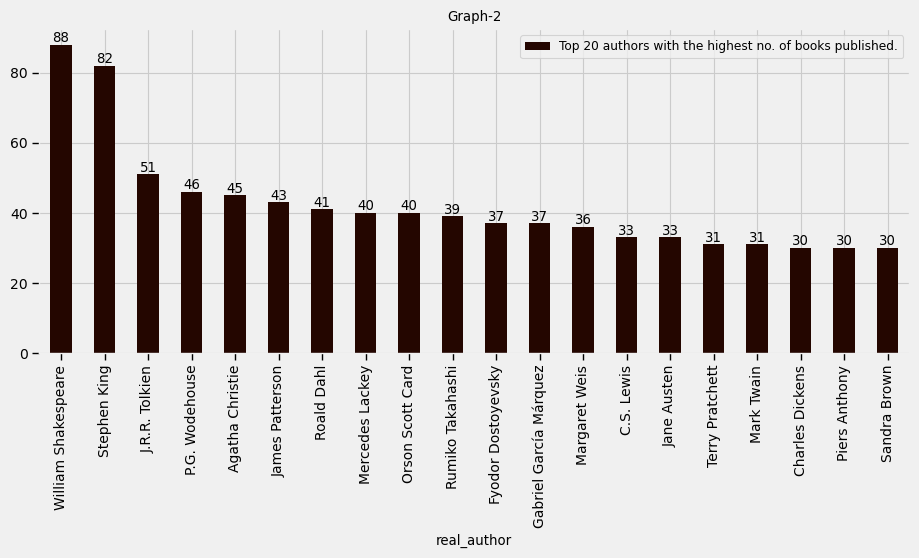

In [16]:
plt.style.use('fivethirtyeight')
sns.set_context('paper')
plt.figure(figsize=(10,4))

ax = df_copy.groupby('real_author')['title'].count().sort_values(ascending=False).head(20).plot(kind='bar', color='#240600', label='Top 20 authors with the highest no. of books published.')
for i in ax.containers:
    ax.bar_label(i, color='k')

plt.legend()
plt.title('Graph-2')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### The graph shows the top 20 authors in decreasing order of the number books authored by them.

On comparing the two graphs, we find a noticeable difference between the count of books by the same author. 

For further analysis, let's take an example. William Shakespeare, although has the most books as suggested by Graph-2, does not occur in Graph-1.

In [17]:
df_copy[df_copy['authors']=='William Shakespeare']['title'].count()

14

In [18]:
ws = df_copy[df_copy['real_author']=='William Shakespeare']
ws['authors']

420      William Shakespeare/Stephen Orgel/A.R. Braunmu...
421                                    William Shakespeare
422            William Shakespeare/Harold Bloom/Rex Gibson
431      William Shakespeare/Stephen Orgel/A.R. Braunmu...
433                    William Shakespeare/Terri Mategrano
                               ...                        
10469                                  William Shakespeare
10470                William Shakespeare/Juliet Dusinberre
10471         William Shakespeare/SparkNotes/John Crowther
10593    William Shakespeare/Stephen Orgel/A.R. Braunmu...
10807    William Shakespeare/Susan Snyder/Deborah T. Cu...
Name: authors, Length: 88, dtype: object

In [19]:
ws['authors'].describe()

count                      88
unique                     56
top       William Shakespeare
freq                       14
Name: authors, dtype: object

We can notice the number of occurences of 'William Shakespeare' in the 'authors' column is _14_, very small compared to its counterpart, the column 'real_author' where the value is _88_.

This discrepancy could be attributed to the fact that various other people along with Shakespeare have been credited as the book's authors. They may be
- Translators, for classics originally published in a foreign language
- Illustrators
- Editors
- Audio book narrators


<a id='most_occur'></a>

### Top 20 Most Occuring Books

In [20]:
books = df_copy.value_counts('title').head(20)

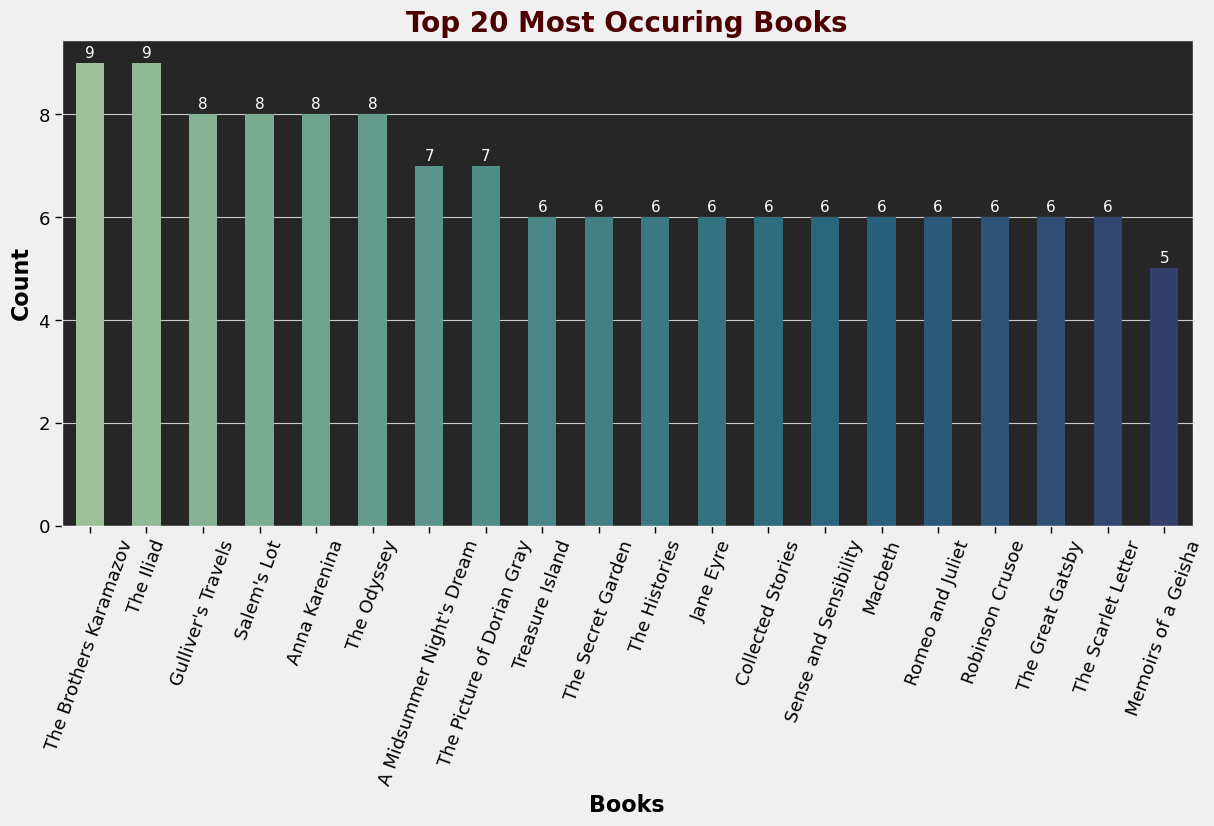

In [21]:

plt.figure(figsize=(13,6))
sns.set_style(rc = {'axes.facecolor': '#262626'})

ax = sns.barplot(data=df_copy, x = books.index, y = books.values, width=0.5, palette = "crest")

for i in ax.containers:
    ax.bar_label(i, color='white', fontsize= 11, padding= 2)

plt.title('Top 20 Most Occuring Books', fontsize = 20, fontweight='bold', color='#4d0000')

plt.xlabel('Books', fontsize = 16, fontweight='bold')
plt.ylabel('Count', fontsize =16, fontweight='bold')
plt.xticks(fontsize=13,rotation=70, color='k')
plt.yticks(fontsize=13, color='k')

plt.show()

#### From the plot, we can clearly say that 'The Brothers Karamazov' and 'The Iliad' have the most occurences in the list.

These books have been published several times by different publishers, with different translations, in different languages. Some of these books are very old and all-time classics, and some are used in English literature curriculums at schools, giving rise to their high demand and multiple published versions.

<a id='high_rate'></a>

## Top 10 Highest Rated Books

In [22]:
avg = df_copy['ratings_count'].mean()
temp_df = df_copy[df_copy['ratings_count']>= avg]
rate = temp_df.groupby('title')['average_rating'].mean().sort_values(ascending=False).head(10)

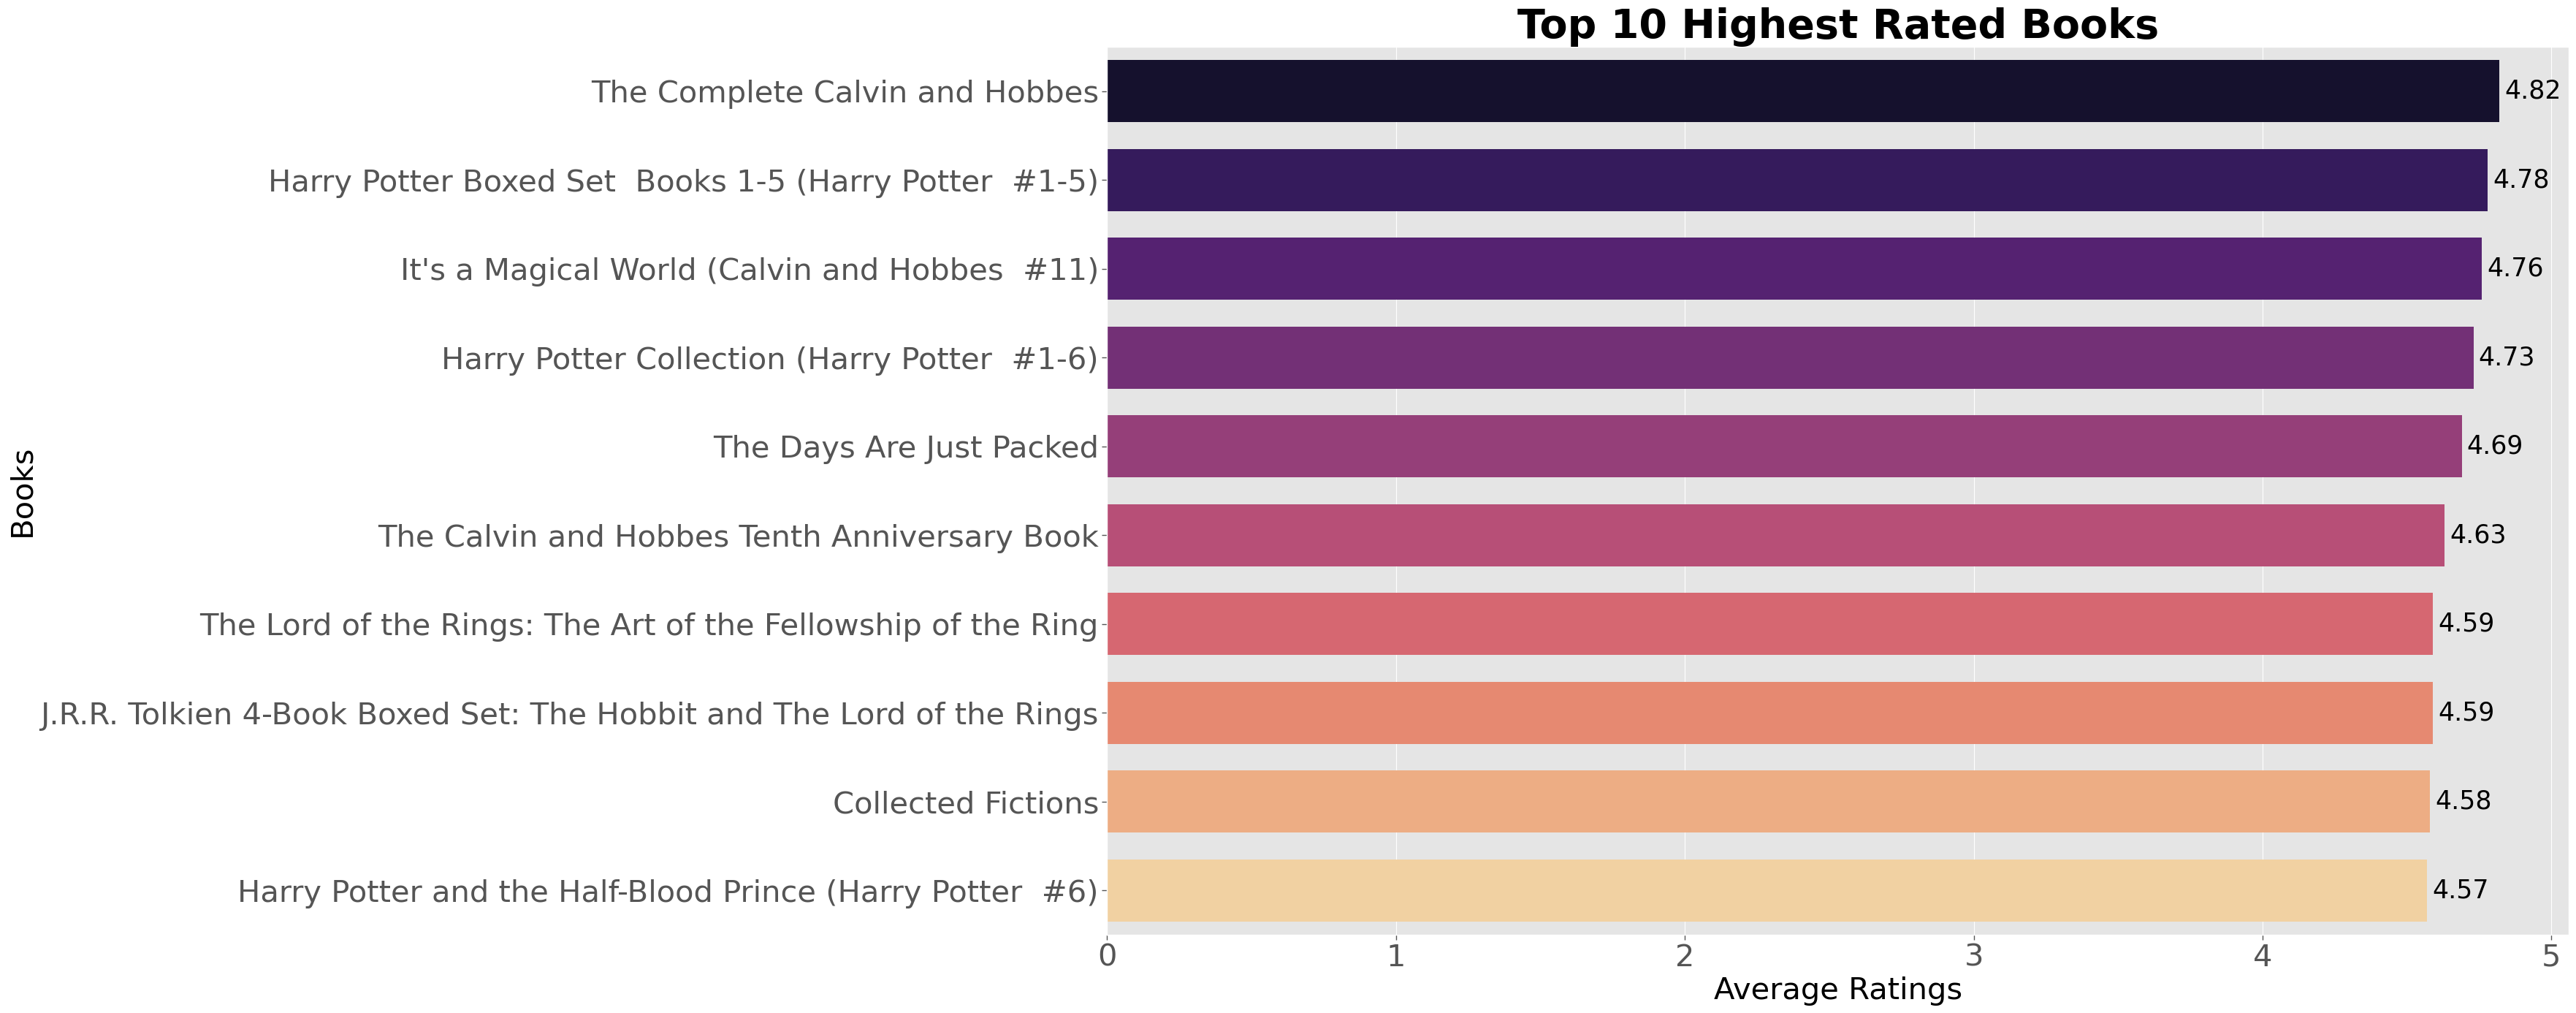

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(23,15))
ax = sns.barplot(data= df_copy, x = rate.values, y = rate.index, width = 0.7, palette='magma')
for i in ax.containers:
    ax.bar_label(i, fontsize = 25, padding = 5)

plt.title('Top 10 Highest Rated Books', fontsize = 40, fontweight = 'bold', color='k')
plt.xlabel('Average Ratings', fontsize=30)
plt.ylabel('Books', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

#### We can infer from the plot that the 'Calvin and Hobbes' and 'Harry Potter' books have received the highest ratings in the list.

Although the Calvin and Hobbes books top the list with the highest average rating, there are other facts to consider while making a conclusion, one of which is the rating count on each book.
Hence, to make the observation as unbiased as possible, we've taken only those books into account that have a rating count higher than the mean rating count of all books in the list.

<a id='pop'></a>

### Top 10 Most Popular Books Of All Time

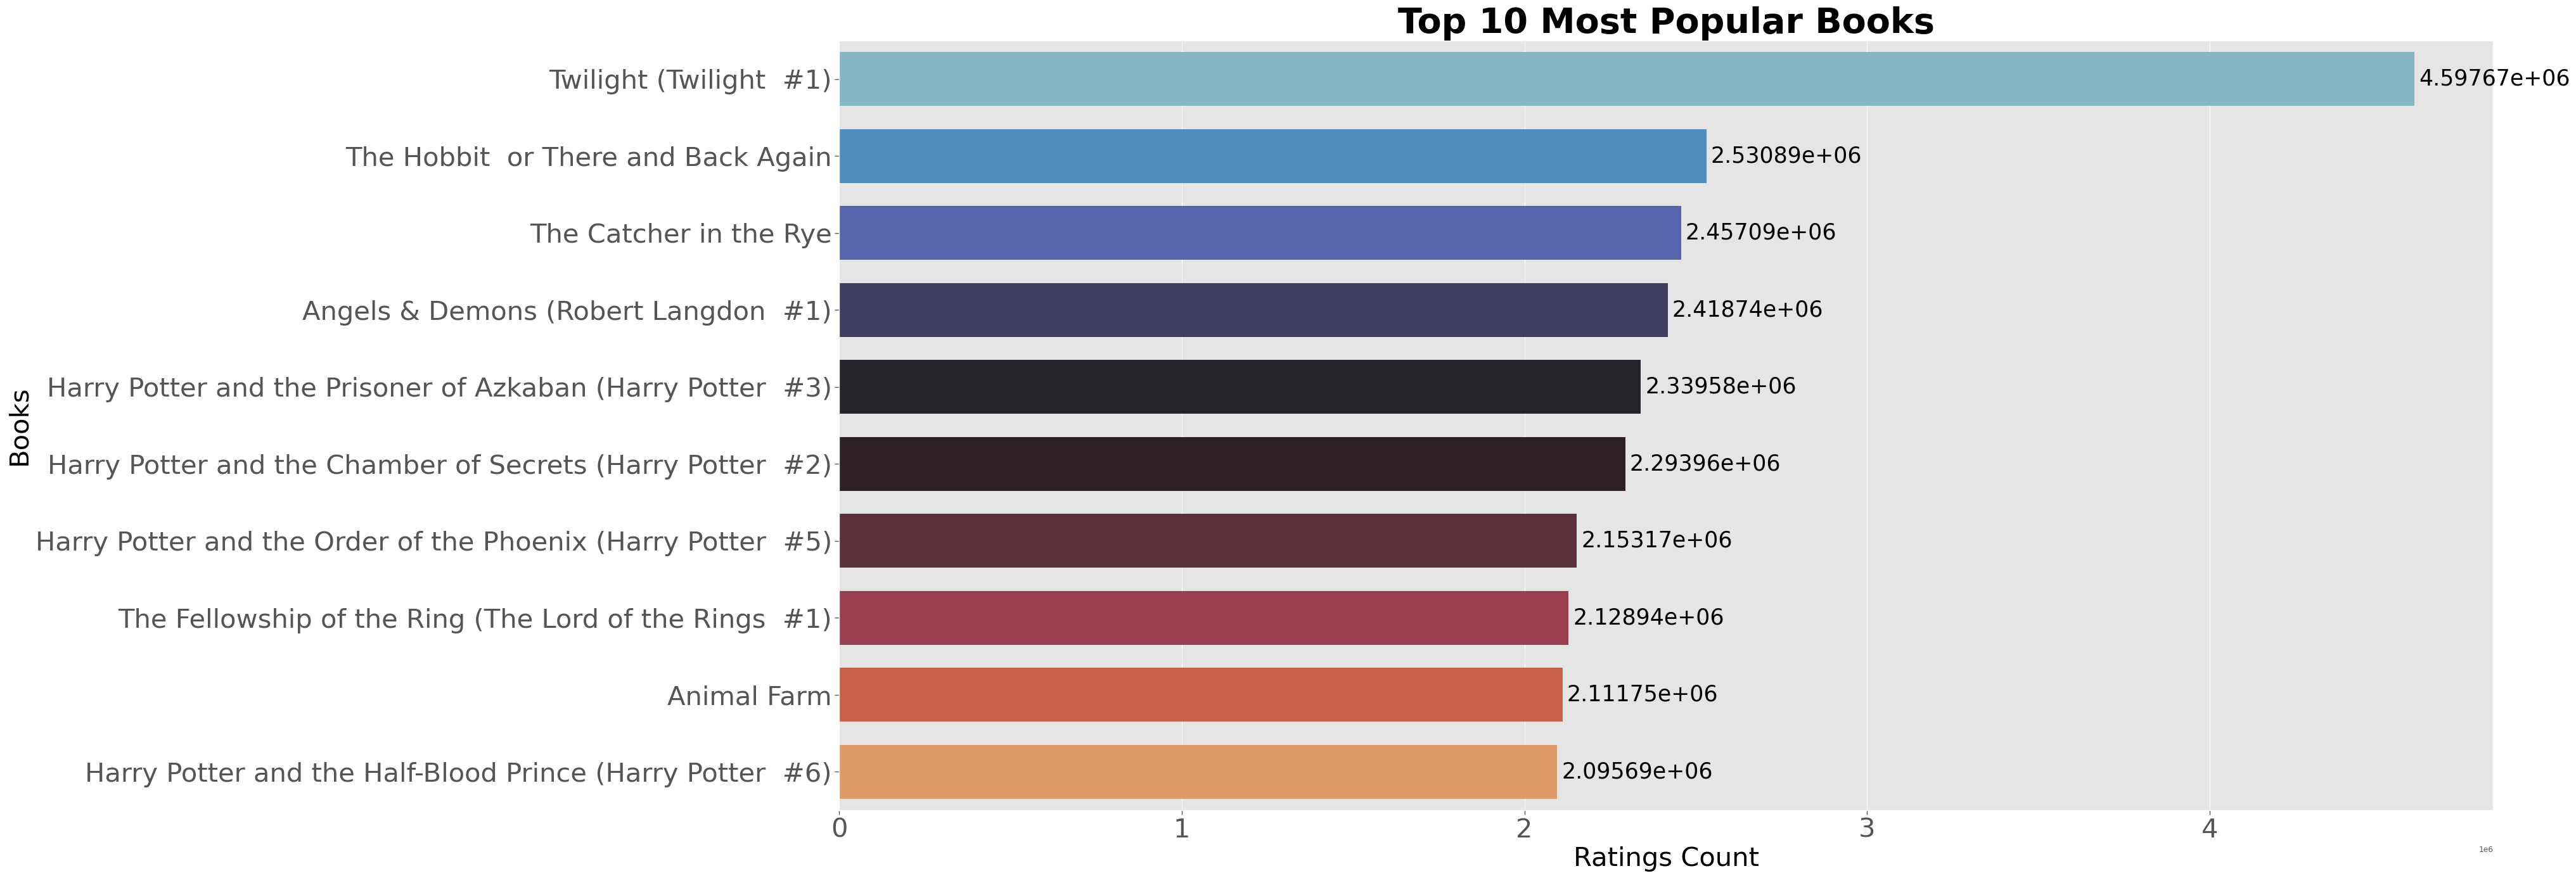

In [24]:
pop = df_copy.sort_values('ratings_count', ascending=False).head(10)

plt.style.use('ggplot')
plt.figure(figsize=(30,15))

ax = sns.barplot(data= df_copy, x = pop['ratings_count'], y = pop['title'], width = 0.7, palette='icefire')
for i in ax.containers:
    ax.bar_label(i, fontsize = 25, padding = 5)
    
plt.title('Top 10 Most Popular Books', fontsize = 40, fontweight = 'bold', color='k')
plt.xlabel('Ratings Count', fontsize=30)
plt.ylabel('Books', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()

<a id='avg_rate_vs_count'></a>

### Let's try to understand the distribution of average ratings and number of ratings in the list.

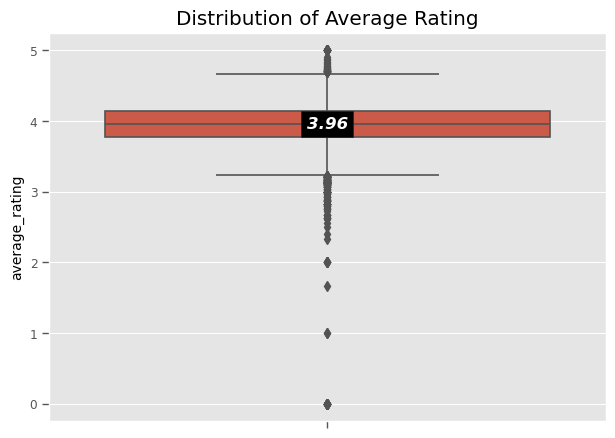

In [25]:

ax = sns.boxplot(data=df_copy, y='average_rating')

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],2)
    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='semibold', fontstyle='italic',size=12,color='white',bbox=dict(facecolor='k',edgecolor='#331e00'))
    
plt.title('Distribution of Average Rating')
plt.show()

The median of average_ratings is approximately 3.96 and has a slight negative skew, which means the mean < median of the data. This implies the data constitute higher frequency of low valued scores, which is also evident through the plot.

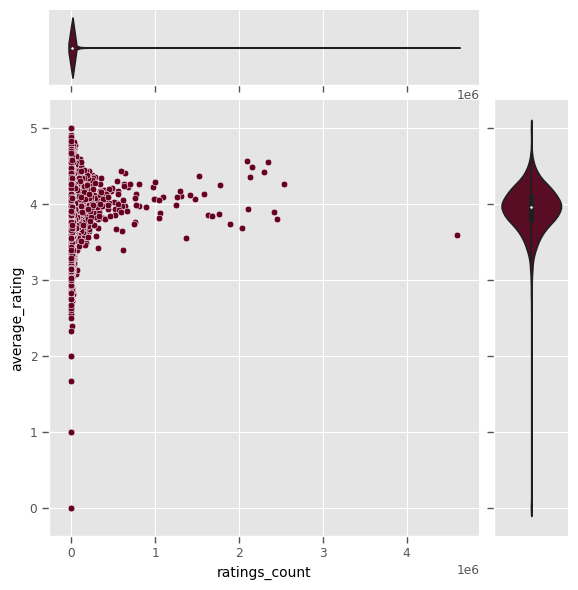

In [26]:
g = sns.JointGrid(data=df_copy,x='ratings_count',y='average_rating')
g.plot(sns.scatterplot,sns.violinplot, color='#660020')
plt.tight_layout
plt.show()

#### The plot gives a detailed understanding of the distribution of ratings across the dataset. 

We have already seen that the plot of average_rating is negatively skewed. What about the rating count?  
From the graph, we can see there are many outliers in the ratings count, and they lie to the right of the plot. From this we can infer that the data here is positively skewed, and hence, more books have a high rating count.

As for the relationship between rating count and average rating, we can conclude the following:
- The rating count for most books is below 1,000,000.
- For books with higher rating count, the average rating lies roughly between 3.5-4.5
- Books with average rating close to 5, generally have very low rating count.

It is apparent that although average rating is a measure of how loved the book is, it is not always as reliable without a substantial count. Similarly, rating count is just a measure of popularity.

Although, fan favourites tend to be good!

<a id='pie'></a>

## Pie chart depicting distribution of average rating

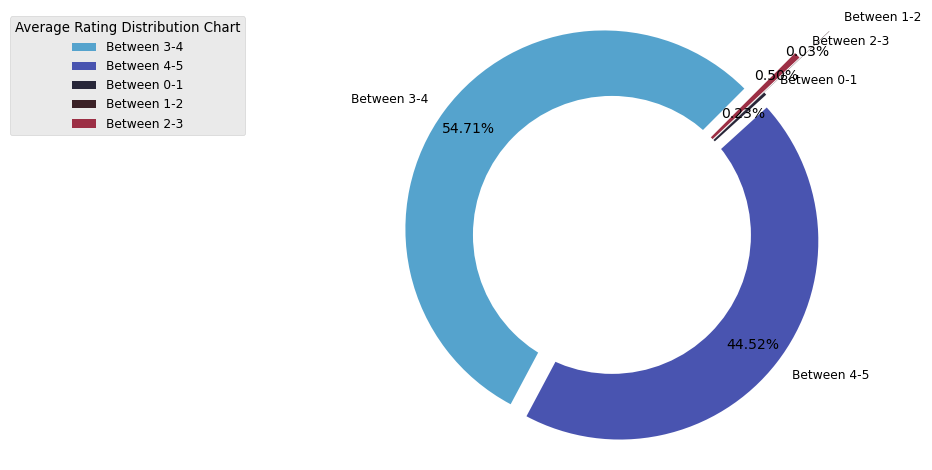

In [27]:
zero = df_copy[(df_copy['average_rating'] >= 0) & (df_copy['average_rating'] < 1)].shape[0]
one = df_copy[(df_copy['average_rating'] >= 1) & (df_copy['average_rating'] < 2)].shape[0]
two = df_copy[(df_copy['average_rating'] >= 2) & (df_copy['average_rating'] < 3)].shape[0]
three = df_copy[(df_copy['average_rating'] >= 3) & (df_copy['average_rating'] < 4)].shape[0]
four = df_copy[(df_copy['average_rating'] >= 4) & (df_copy['average_rating'] <= 5)].shape[0]

data=[three, four, zero, one, two]
keys=['Between 3-4','Between 4-5','Between 0-1','Between 1-2','Between 2-3']
palette_color = sns.color_palette('icefire')
plt.pie(data, labels=keys, autopct='%0.2f%%', explode=[0.05,0.05,0.05,0.5,0.3],pctdistance=0.85, startangle = 45, colors=palette_color)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.legend(keys, loc = "best",title="Average Rating Distribution Chart", bbox_to_anchor=(-0.1, 1.))
plt.show()

<a id='career'></a>

## Analysis on the careers of some of the best authors of all time:

- J.K. Rowling
- Stephen King
- J.R.R. Tolkien
- Agatha Christie
- Fyodor Dostoyevsky

In [28]:
author = ['J.K. Rowling', 'Stephen King','J.R.R. Tolkien','Fyodor Dostoyevsky']

In [29]:
def plot_author(author_df):
    plt.figure(figsize=(7,4))
    sns.set_style(rc = {'axes.facecolor': '#000000'})

    ax=sns.lineplot(x=author_df['year'], y=author_df['average_rating'], marker ='D', markersize=2.5, color='#00b8e6')
    plt.xticks(fontsize=10,rotation=70, color='k')
    plt.yticks(fontsize=10, color='k')
    plt.title('Average rating of books authored by ' + str(author_df['real_author'].iloc[0]), fontsize=15, fontweight='bold', color='k')

    plt.xlabel('Year',fontsize=12)
    plt.ylabel('Average Rating',fontsize=12)
    plt.show()
    return ax

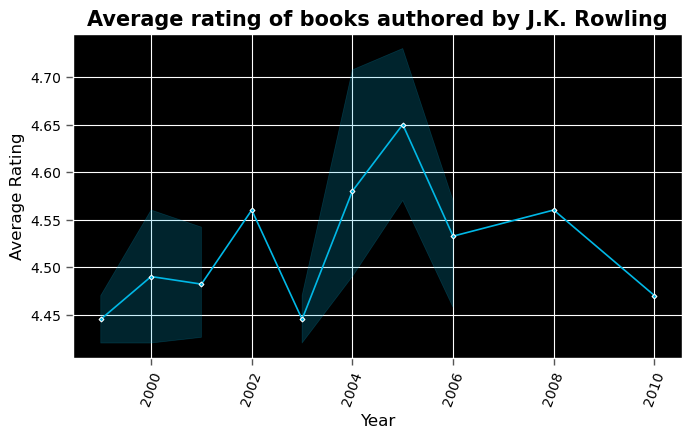

<Axes: title={'center': 'Average rating of books authored by J.K. Rowling'}, xlabel='Year', ylabel='Average Rating'>

In [30]:
author_df = df_copy[df_copy['real_author']==author[0]]
plot_author(author_df)

One of the most successful authors of our time, J.K. Rowling has been famous for her fantasy novel series Harry Potter, which has constantly garnered high ratings of __4.45 and above__, hitting its highest mark at __4.65__. Immensely popular among the young adults, her books also have the highest rating count.

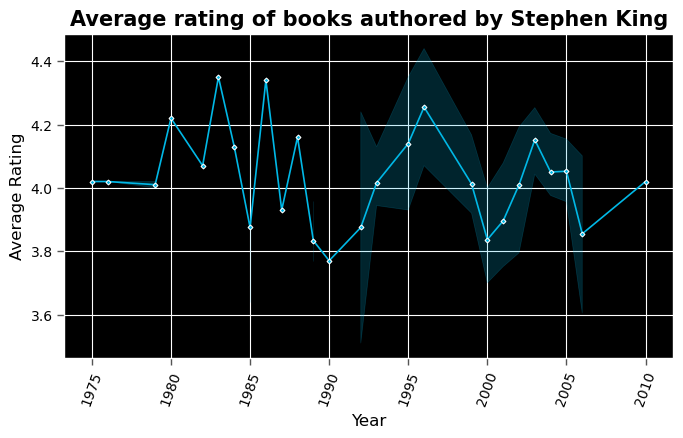

<Axes: title={'center': 'Average rating of books authored by Stephen King'}, xlabel='Year', ylabel='Average Rating'>

In [31]:
author_df = df_copy[df_copy['real_author']==author[1]]
plot_author(author_df)


As inferred from the above plot, the author had hit his peak in the year 1983, with a rating of around 4.3. While his career saw a short dip in 1990, most of his works have been consistent over the years.

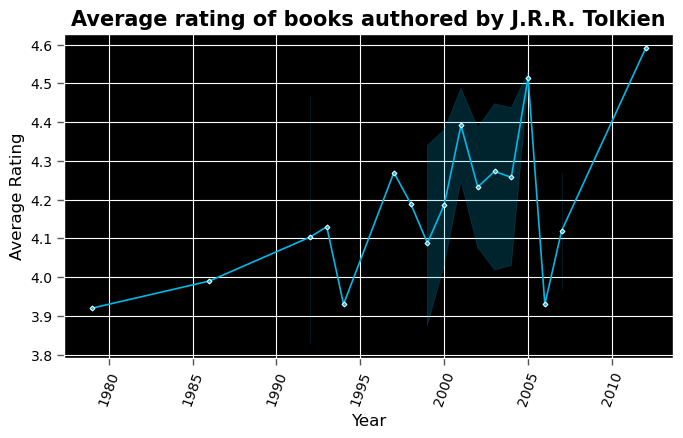

<Axes: title={'center': 'Average rating of books authored by J.R.R. Tolkien'}, xlabel='Year', ylabel='Average Rating'>

In [32]:
author_df = df_copy[df_copy['real_author']==author[2]]
plot_author(author_df)

A steady rise for almost 25 years ended with a brief yet sharp fall in 2006, where his average rating dropped from 4.5 to 3.9, only to peak at __4.6__ a few years later.

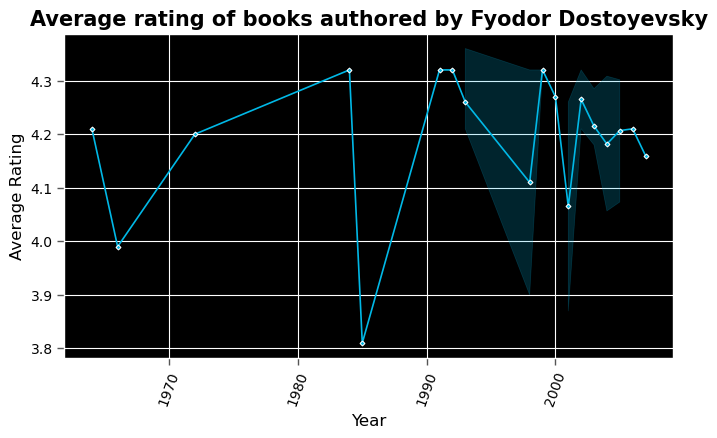

<Axes: title={'center': 'Average rating of books authored by Fyodor Dostoyevsky'}, xlabel='Year', ylabel='Average Rating'>

In [33]:
author_df = df_copy[df_copy['real_author']==author[3]]
plot_author(author_df)

Regarded as one of the greatest novelists of all time, the writer has had a remarkable career with his books having a rating over 3.8. One his famous works __The Brothers Karamazov__ rated 4.3, is in the top 11 of most occuring books.

<a id='3d'></a>

The graph between rating count and number of pages is denser when the latter lies in the range of 0-1000.

### Let's take a closer look at this portion.
<a id='page_vs_count'></a>

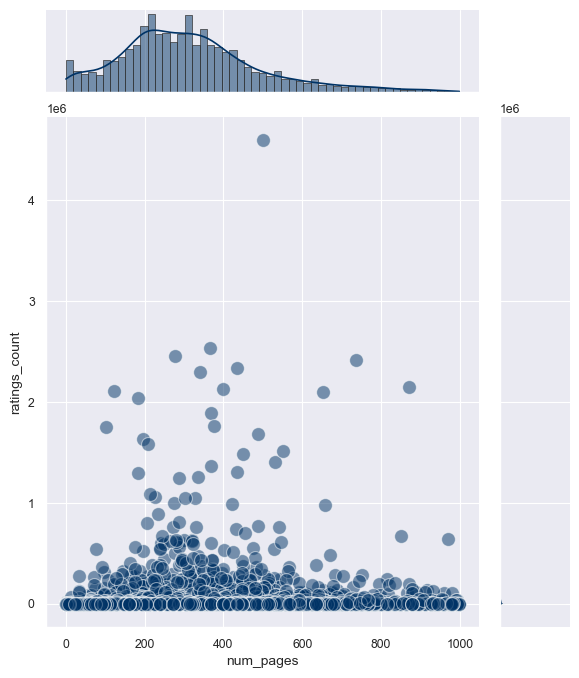

In [34]:
temp1_df=df_copy[df_copy['num_pages']<1000]
# Create a JointGrid
sns.set_style('darkgrid')
g = sns.JointGrid(data=temp1_df, x='num_pages', y='ratings_count', space = 0.3)

# Adjust the size of the JointGrid
g.fig.set_figheight(7)  # Set the height of the grid
g.fig.set_figwidth(6)  # Set the width of the grid
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color= '#003366')  # Plot the joint plot
g.plot_marginals(sns.histplot, kde=True, edgecolor="0.2", color='#003366')  # Plot the marginal plots

# Display the grid
plt.tight_layout
plt.show()


It is clear from the probability distribution that the most rated books generally have around 200-400 pages. As the number of pages increases, the plot becomes sparser with a declining readability.

<a id='lang_dist'></a>

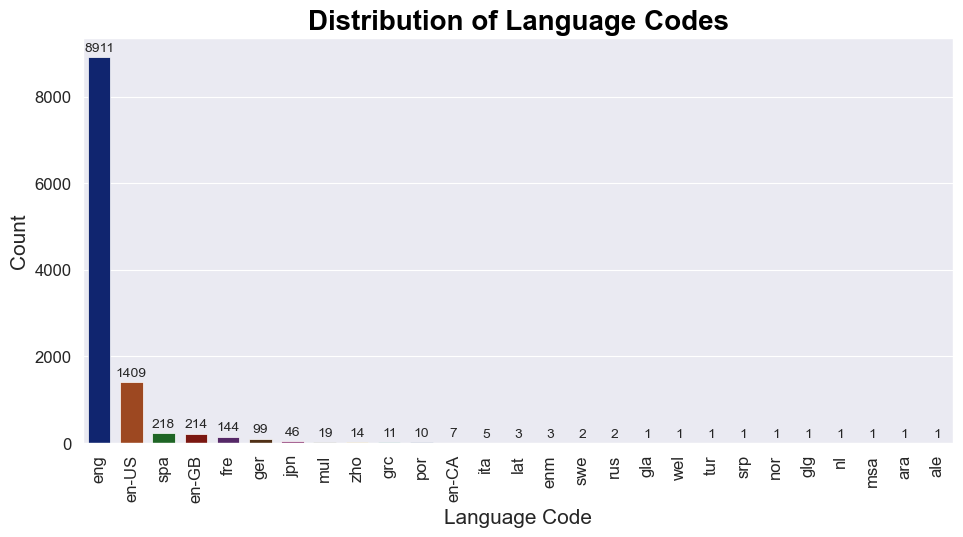

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
lang = df_copy.value_counts('language_code')
ax = sns.barplot(data= df_copy, y = lang.values, x = lang.index, width = 0.7, palette='dark')
for i in ax.containers:
    ax.bar_label(i, fontsize = 10, padding = 2)

plt.title('Distribution of Language Codes', fontsize = 20, fontweight = 'bold', color='k')
plt.xlabel('Language Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()


As clearly indicated, the majority of books are in __English__ language, further divided into English-US, English-UK, English-CA, totalling up to __10,541__. The most occuring languages after English are Spanish, French, and Japanese, in decreasing order of count.

<a id='high_rev'></a>
### Top 10 books with the highest review count:

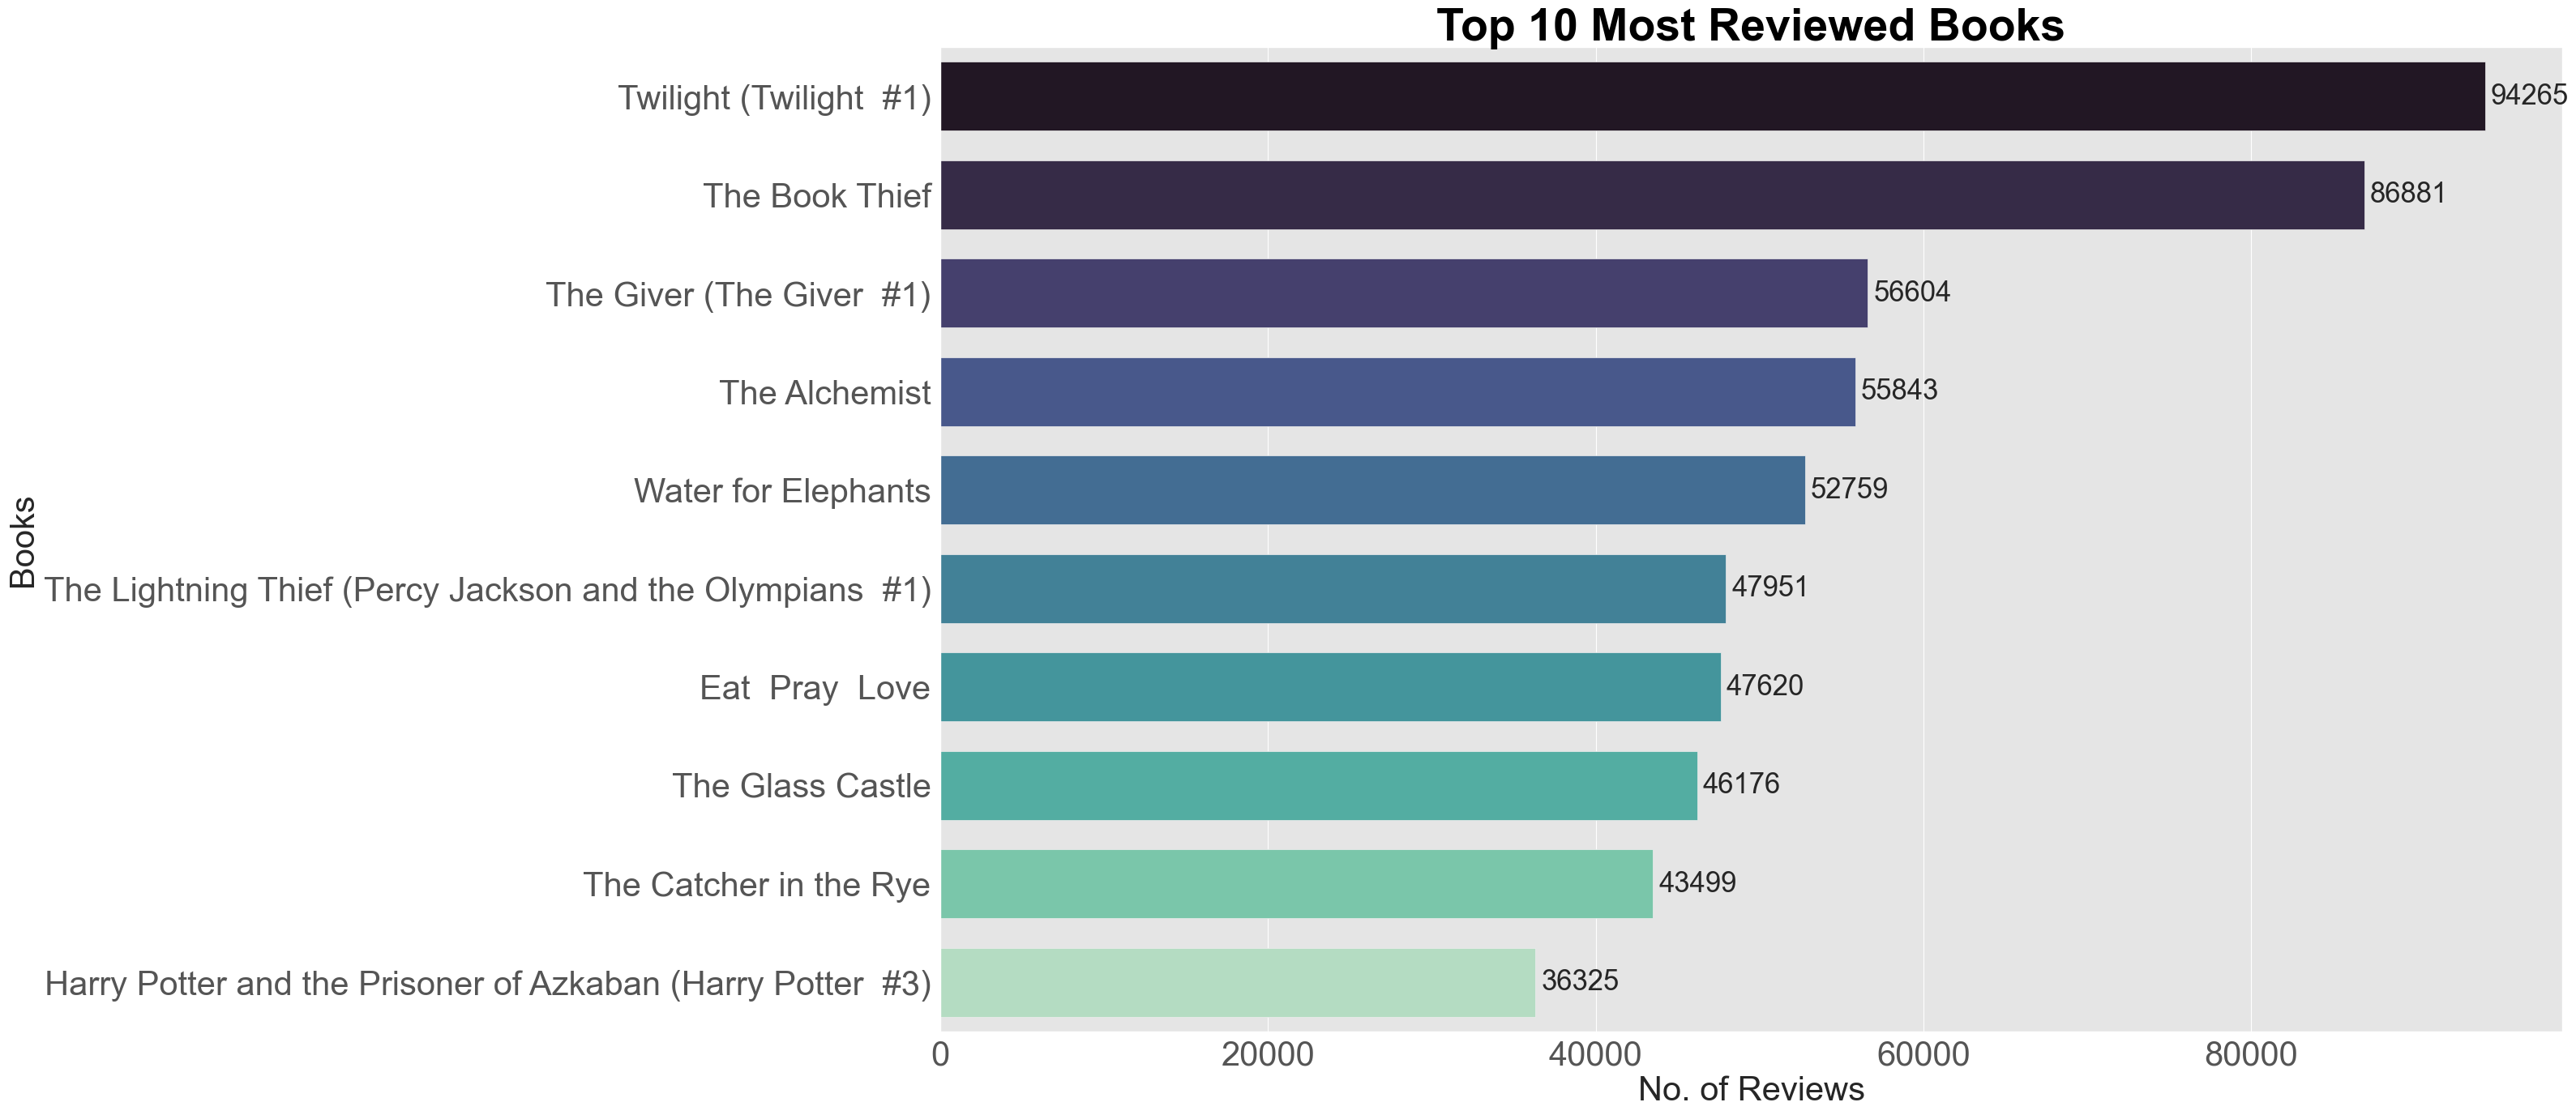

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(23,15))

rev = df_copy.sort_values('text_reviews_count', ascending=False).head(10)

ax = sns.barplot(data= df_copy, x = rev['text_reviews_count'], y = rev['title'], width = 0.7, palette='mako')
for i in ax.containers:
    ax.bar_label(i, fontsize = 25, padding = 5)

plt.title('Top 10 Most Reviewed Books', fontsize = 40, fontweight = 'bold', color='k')
plt.xlabel('No. of Reviews', fontsize=30)
plt.ylabel('Books', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

<a id='rate_vs_rev'></a>
### Is there any relationship between the number of ratings and reviews on a book? 

<Axes: xlabel='ratings_count', ylabel='text_reviews_count'>

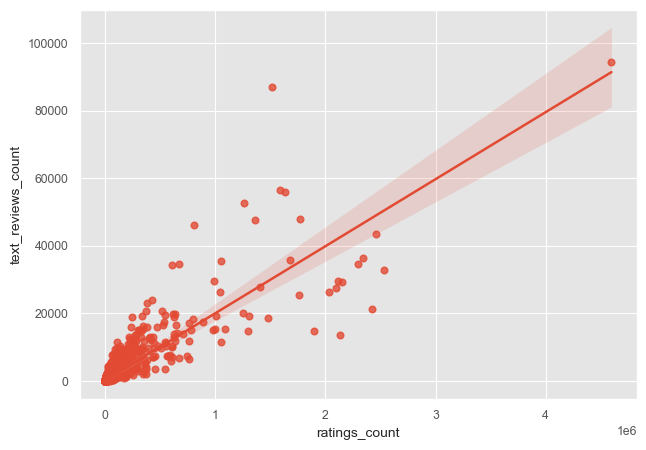

In [37]:
sns.regplot(data=df_copy, y='text_reviews_count', x= 'ratings_count')

<a id='pub'></a>
### Top 10 publishers in the list

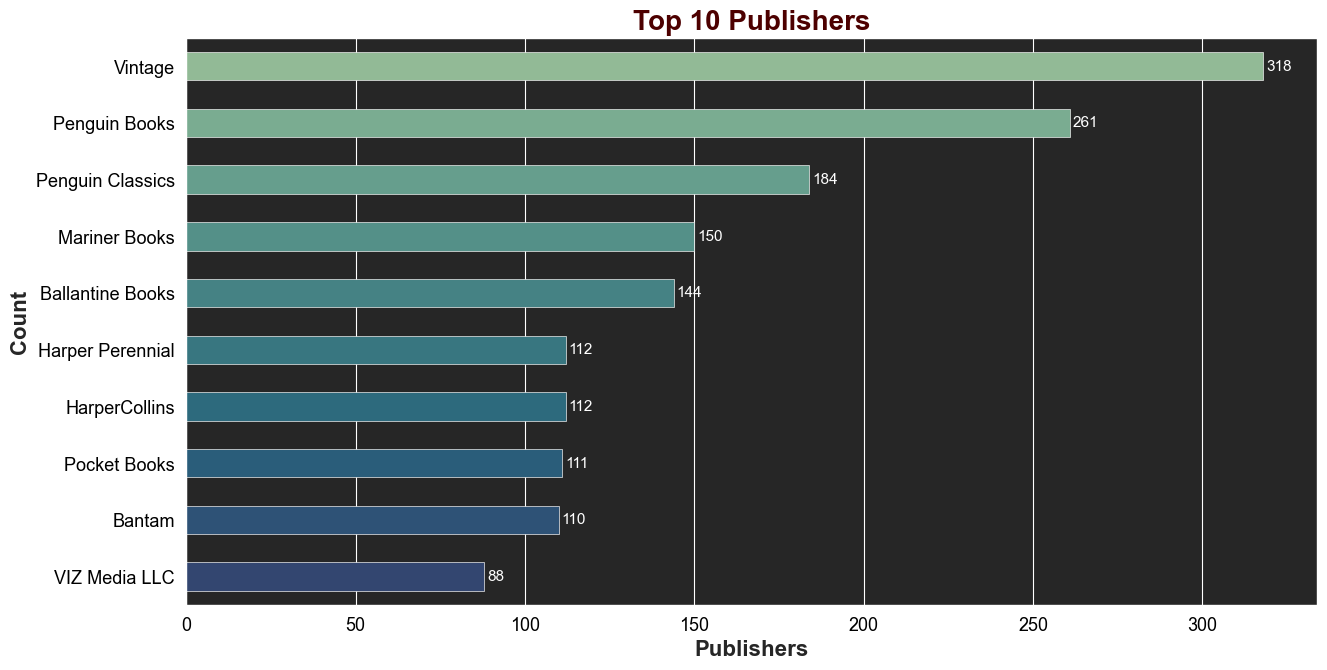

In [38]:
plt.figure(figsize=(13,7))
sns.set_style(rc = {'axes.facecolor': '#262626'})

pub = df_copy.value_counts('publisher').head(10)

ax = sns.barplot(data=df_copy, x = pub.values, y = pub.index, width=0.5, palette = "crest")
for i in ax.containers:
    ax.bar_label(i, color='white', fontsize= 11, padding= 2)

plt.title('Top 10 Publishers', fontsize = 20, fontweight='bold', color='#4d0000')

plt.xlabel('Publishers', fontsize = 16, fontweight='bold')
plt.ylabel('Count', fontsize =16, fontweight='bold')
plt.xticks(fontsize=13, color='k')
plt.yticks(fontsize=13, color='k')

plt.show()

Vintage and the Penguin Group (classified into Penguin Books and Penguin Classics in the plot) have been the leading publishers of classic literature in most English speaking countries. With a total count of 445, the Penguin Group has secured it's place as a reputable publishing brand. 
For people who prefer large press over a small press, this graph provides a useful criteria to choose a book.

<a id='year_vs_page'></a>
### Could there be a relation between how long a book is, based on when it was published?

<Axes: xlabel='year', ylabel='num_pages'>

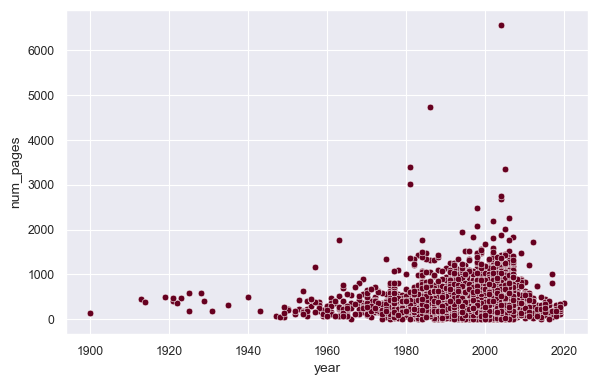

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_copy, y ='num_pages', x ='year', color='#660020')

##### To make a more accurate observation, let's compare the length of books in two year-ranges, '1940-1980' and '1980-2020'

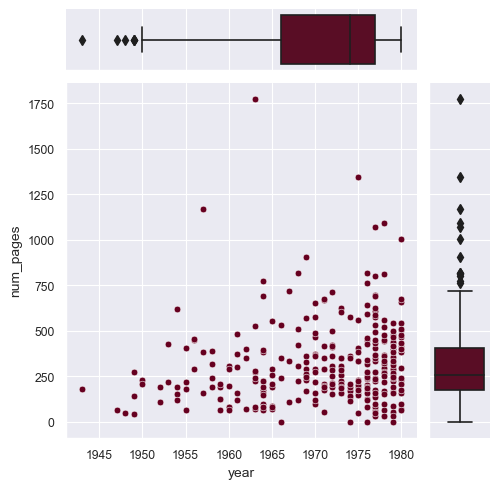

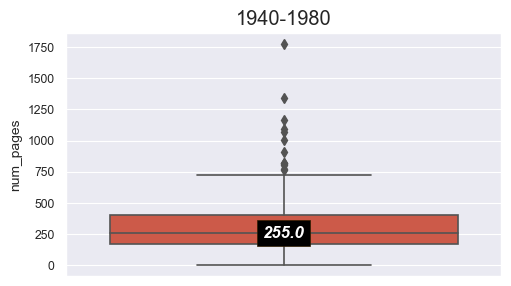

In [44]:
eighties = df_copy[(df_copy['year']>1940) & (df_copy['year']<=1980)]
twoks = df_copy[(df_copy['year']>1980) & (df_copy['year']<=2020)]

g = sns.JointGrid(data = eighties, x = 'year',y = 'num_pages', height=5)
g.plot(sns.scatterplot,sns.boxplot, color='#660020')
plt.tight_layout
plt.show()

plt.figure(figsize=(5,3))
ax = sns.boxplot(data=eighties, y ='num_pages')

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],2)
    ax.text(cat, y,f'{y}',ha='center',va='center',fontweight='semibold',fontstyle='italic',size=12,color='white',bbox=dict(facecolor='k',edgecolor='#331e00'))
    
plt.title('1940-1980')
plt.show()

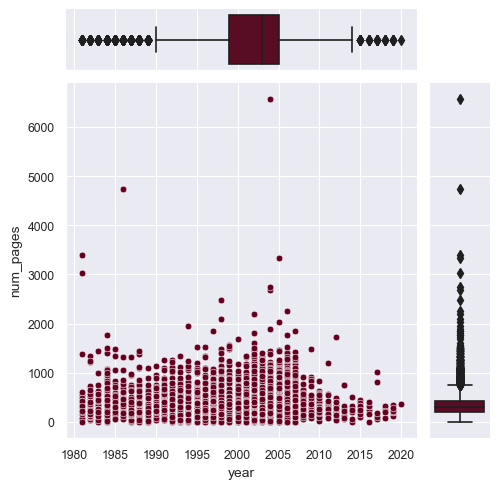

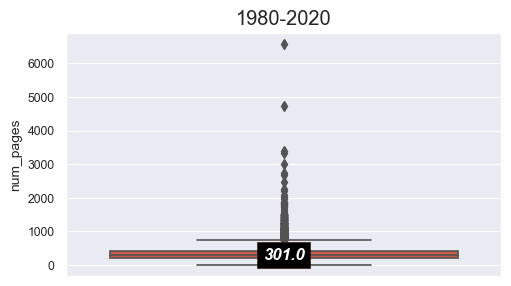

In [45]:
g = sns.JointGrid(data = twoks, x = 'year',y = 'num_pages', height=5)
g.plot(sns.scatterplot,sns.boxplot, color='#660020')
plt.tight_layout
plt.show()

plt.figure(figsize=(5,3))
ax = sns.boxplot(data=twoks, y ='num_pages')

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],2)
    ax.text( cat, y, f'{y}', ha='center', va='center',fontweight='semibold', fontstyle='italic',size=12,color='white',bbox=dict(facecolor='k',edgecolor='#331e00'))
    
plt.title('1980-2020')
plt.show()

##### From the plots and further calculation, it is evident that there has been a significant rise of 18% in the length of books over a period of 80 years.

Much of this shift could be attributed to the rise of ebooks and audiobooks that make it hard for people to bolt at the sight of a thick book. Despite all the talk of the death of the book because of competition from other media, people who love to read, seem to prefer a long and immersive narrative.

In [42]:
df_copy.to_csv('clean_book.csv')

<p style="text-align:center">Thankyou!</p>

##### [Jump to the top](#top)